Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [168]:
import numpy as np
from scipy import stats

loc = 1.06  # математическое ожидание
quantile = 0.05
inaccuracy = 0.0001
step = 0
x = 2
while abs(x - quantile) > 0.0001:
    step += 0.1
    scale = 1 / step 
    x = stats.norm.cdf(x=1, loc=1.06, scale=scale)    
print(f"С заданной точностью среднеквадратичное отклонение будет:", scale)

a = stats.norm.cdf(x=1.1, loc=1.06, scale=scale)
#процент коробок с массой больше 1.1кг будет 1 - cdf(1.1), так как процент коробок с массой больше и меньше в сумме дают 1.
print(f"Количество коробок с массой больше 1.1 кг: {round((1 - a) * 100, 4)}%")

С заданной точностью среднеквадратичное отклонение будет: 0.03649635036496335
Количество коробок с массой больше 1.1 кг: 13.6539%


Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке \[a, b\]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12

Математическое ожидание равномерного распределение: $$ M = \frac{a + b}{2}$$
Дисперсия: $$ D = \frac{(b-a)^2}{12}$$
$M_р = \frac {12 + 14}{2}  = 13$<br>
$D_р = \frac {(14 -12)^2}{12} = \frac {1}{3} = 0.(3)$<br>
По центральной предельной теореме сумма распределений стремится  к нормальному распределению с параметрами:
$$\mu = n \cdot M, \:\: \sigma^2 = n \cdot D$$
Следовательно для нашей коробки будет псевдо нормальное распределение с параметрами:<br>
$M = 30 \cdot M_р = 30 \cdot 13 = 390$<br>
$D = 30 \cdot D_р = 30 \cdot 0.(3) = 10$<br>
Среднеквадратичное отклонение $= \sqrt{D} = \sqrt{10}$

In [169]:
norm = stats.norm(loc=390, scale=np.math.sqrt(10))
a = norm.cdf(390)
print(f"Вероятность, что коробка будет весить меньше 390г = {a}")
b = 1 - norm.cdf(395)
print(f"Вероятность, что коробка будет весить больше 395г = {b}")
c = norm.cdf(400) - norm.cdf(380)
print(f"Вероятность, что коробка будет весить от 380г до 400г = {c}")

Вероятность, что коробка будет весить меньше 390г = 0.5
Вероятность, что коробка будет весить больше 395г = 0.056923149003329065
Вероятность, что коробка будет весить от 380г до 400г = 0.9984345977419975


Задача 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).<br>
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.<br>
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.<br>
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).<br><br>

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

Возьмем геометрическое распределение с  p = 0.1
тогда $M = \frac{1}{(1-p)}, D = \frac {p}{(1-p)^2}$

In [170]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 100

In [171]:
p = 0.1
M = (1-p)/p
D = (1-p)/p**2
print(f"Мат ожидание = {M}, дисперсия = {D}")

Мат ожидание = 9.0, дисперсия = 89.99999999999999


Для наших значений n = (1, 2, 4, 8, 20, 50)<br>
По центральной предельной теореме сумма распределений стремится  к нормальному распределению с параметрами:
$$\mu = n \cdot M, \:\: \sigma^2 = n \cdot D$$

In [172]:
m_d = dict() #словарь кортежей с характереистиками наших псевдораспределений.
n = (1, 2, 4, 8, 20, 50)
for i in n:
    m_d[i] = (i * M, np.math.sqrt(i * D))
print(m_d)


{1: (9.0, 9.486832980505138), 2: (18.0, 13.416407864998737), 4: (36.0, 18.973665961010276), 8: (72.0, 26.832815729997474), 20: (180.0, 42.426406871192846), 100: (900.0, 94.86832980505137)}


4.444444444444445

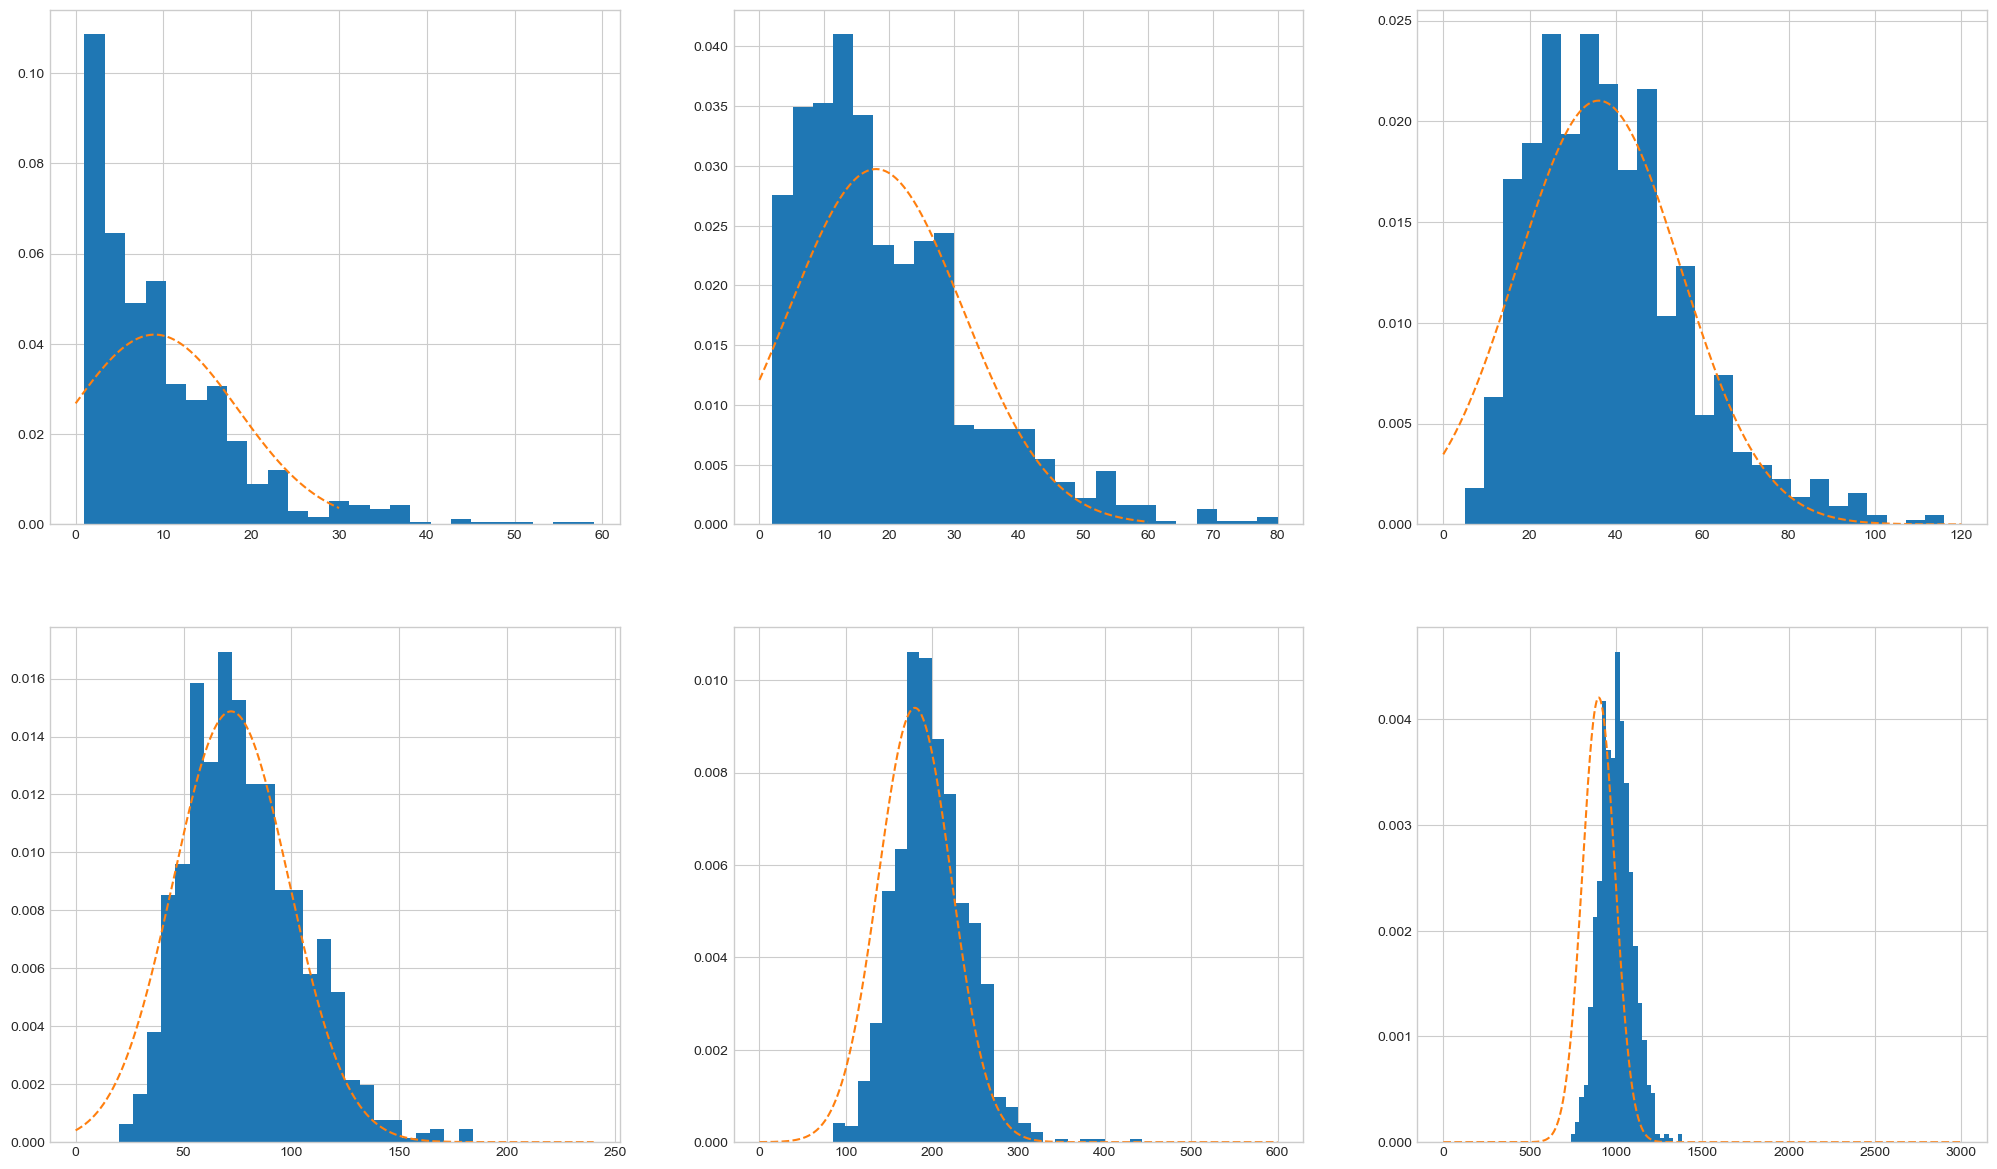

In [173]:

def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности для нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

ox = np.linspace(0, 40, 1000)
fig, ax = plt.subplots(2, 3, figsize=(25, 15))
k = 0
for i in ax:
    for j in i:
        r = sum([geom.rvs(1000) for i in range(n[k])])
        ox = np.linspace(0, n[k] * 30, 1000)
        oy = np.array([pdf_normal(m_d[n[k]][0], m_d[n[k]][1], x) for x in ox])

        k += 1
        j.hist(r, bins=25, density=True)
        j.plot(ox, oy, linestyle='dashed')

# ox = np.linspace(0, 40, 1000)
# oy = np.array([pdf_normal(loc, scale, x) for x in ox])

# plt.hist(samples, density=True, bins=15)
# plt.plot(ox, oy, linestyle='dashed')

Тут явный сдвиг виден, но я не могу разобраться почему он тут присутствует. но всетаки видно что нормализуется распределение.